In [1]:
# Hvor meget strøm er der blevet brugt af alle nodes
# Hvor meget strøm der er genereret af PV
# Hvor strøm der er hentet fra grid


# Kommer batterier nogensinde til 100% - Svar: JA
# Exporter vi nogensinde strøm til grid - Svar: NEJ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
import seaborn as sns
import os

PATH_PLUGIN = '../results/plugin/25may-5xspeed-withplugin/logs/'
PATH_DEFAULT_SCHEDULER = '../results/default-scheduler/26may-5xspeed-withoutplugin/logs/'

battery_cols = ['battery', 'battery.1', 'battery.2', 'battery.3', 'battery.4']
node_cols = ['node', 'node.1', 'node.2', 'node.3', 'node.4', 'node.5', 'node.6', 'node.7', 'node.8', 'node.9', 'node.10', 'node.11', 'node.12', 'node.13', 'node.14', 'node.15', 'node.16', 'node.17']
pv_cols = ['pv_source', 'pv_source.1', 'pv_source.2', 'pv_source.3']
grid_cols = ['grid', 'grid.1', 'grid.2', 'grid.3', 'grid.4', 'grid.5', 'grid.6', 'grid.7']


## Generate a dict for each microgrid

In [3]:
gridnames = pd.read_csv('../data/gridnames.csv')
names = gridnames['Gridname'].to_list()

dataframes_plugin = {}
dataframes_default_scheduler = {}


for name in names:
    file_path = os.path.join(PATH_PLUGIN, f"{name}.csv")
    if os.path.exists(file_path):
        dataframes_plugin[name] = pd.read_csv(file_path)
    else:
        print(f"Warning: File {file_path} does not exist.")

for name in names:
    file_path = os.path.join(PATH_DEFAULT_SCHEDULER, f"{name}.csv")
    if os.path.exists(file_path):
        dataframes_default_scheduler[name] = pd.read_csv(file_path)
    else:
        print(f"Warning: File {file_path} does not exist.")




## Battery Dataframes

In [4]:
battery_dataframes_plugin = {}
battery_dataframes_scheduler = {}

for name, df in dataframes_plugin.items():
    existing_cols = [col for col in battery_cols if col in df.columns]
    battery_dataframes_plugin[name] = df[existing_cols]

for name, df in dataframes_default_scheduler.items():
    existing_cols = [col for col in battery_cols if col in df.columns]
    battery_dataframes_scheduler[name] = df[existing_cols]


### Rename headers

In [5]:
for key, df in battery_dataframes_plugin.items():
    df.columns = df.iloc[1]
    df = df.drop(index=[0, 1]).reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    battery_dataframes_plugin[key] = df

for key, df in battery_dataframes_scheduler.items():
    df.columns = df.iloc[1]
    df = df.drop(index=[0, 1]).reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    battery_dataframes_scheduler[key] = df


battery_dataframes_plugin['AL00']


1    charge_amount  current_charge  discharge_amount  reward       soc
0              0.0    11648.350000             720.0    -0.0  0.500000
1              0.0    10848.350000             718.0    -0.0  0.465660
2              0.0    10050.572222             720.0    -0.0  0.431416
3              0.0     9250.572222             720.0    -0.0  0.397077
4              0.0     8450.572222             720.0    -0.0  0.362737
..             ...             ...               ...     ...       ...
303            0.0        0.000000               0.0    -0.0  0.000000
304            0.0        0.000000               0.0    -0.0  0.000000
305            0.0        0.000000               0.0    -0.0  0.000000
306            0.0        0.000000               0.0    -0.0  0.000000
307            0.0        0.000000               0.0    -0.0  0.000000

[308 rows x 5 columns]

### Plot figures (SOC)

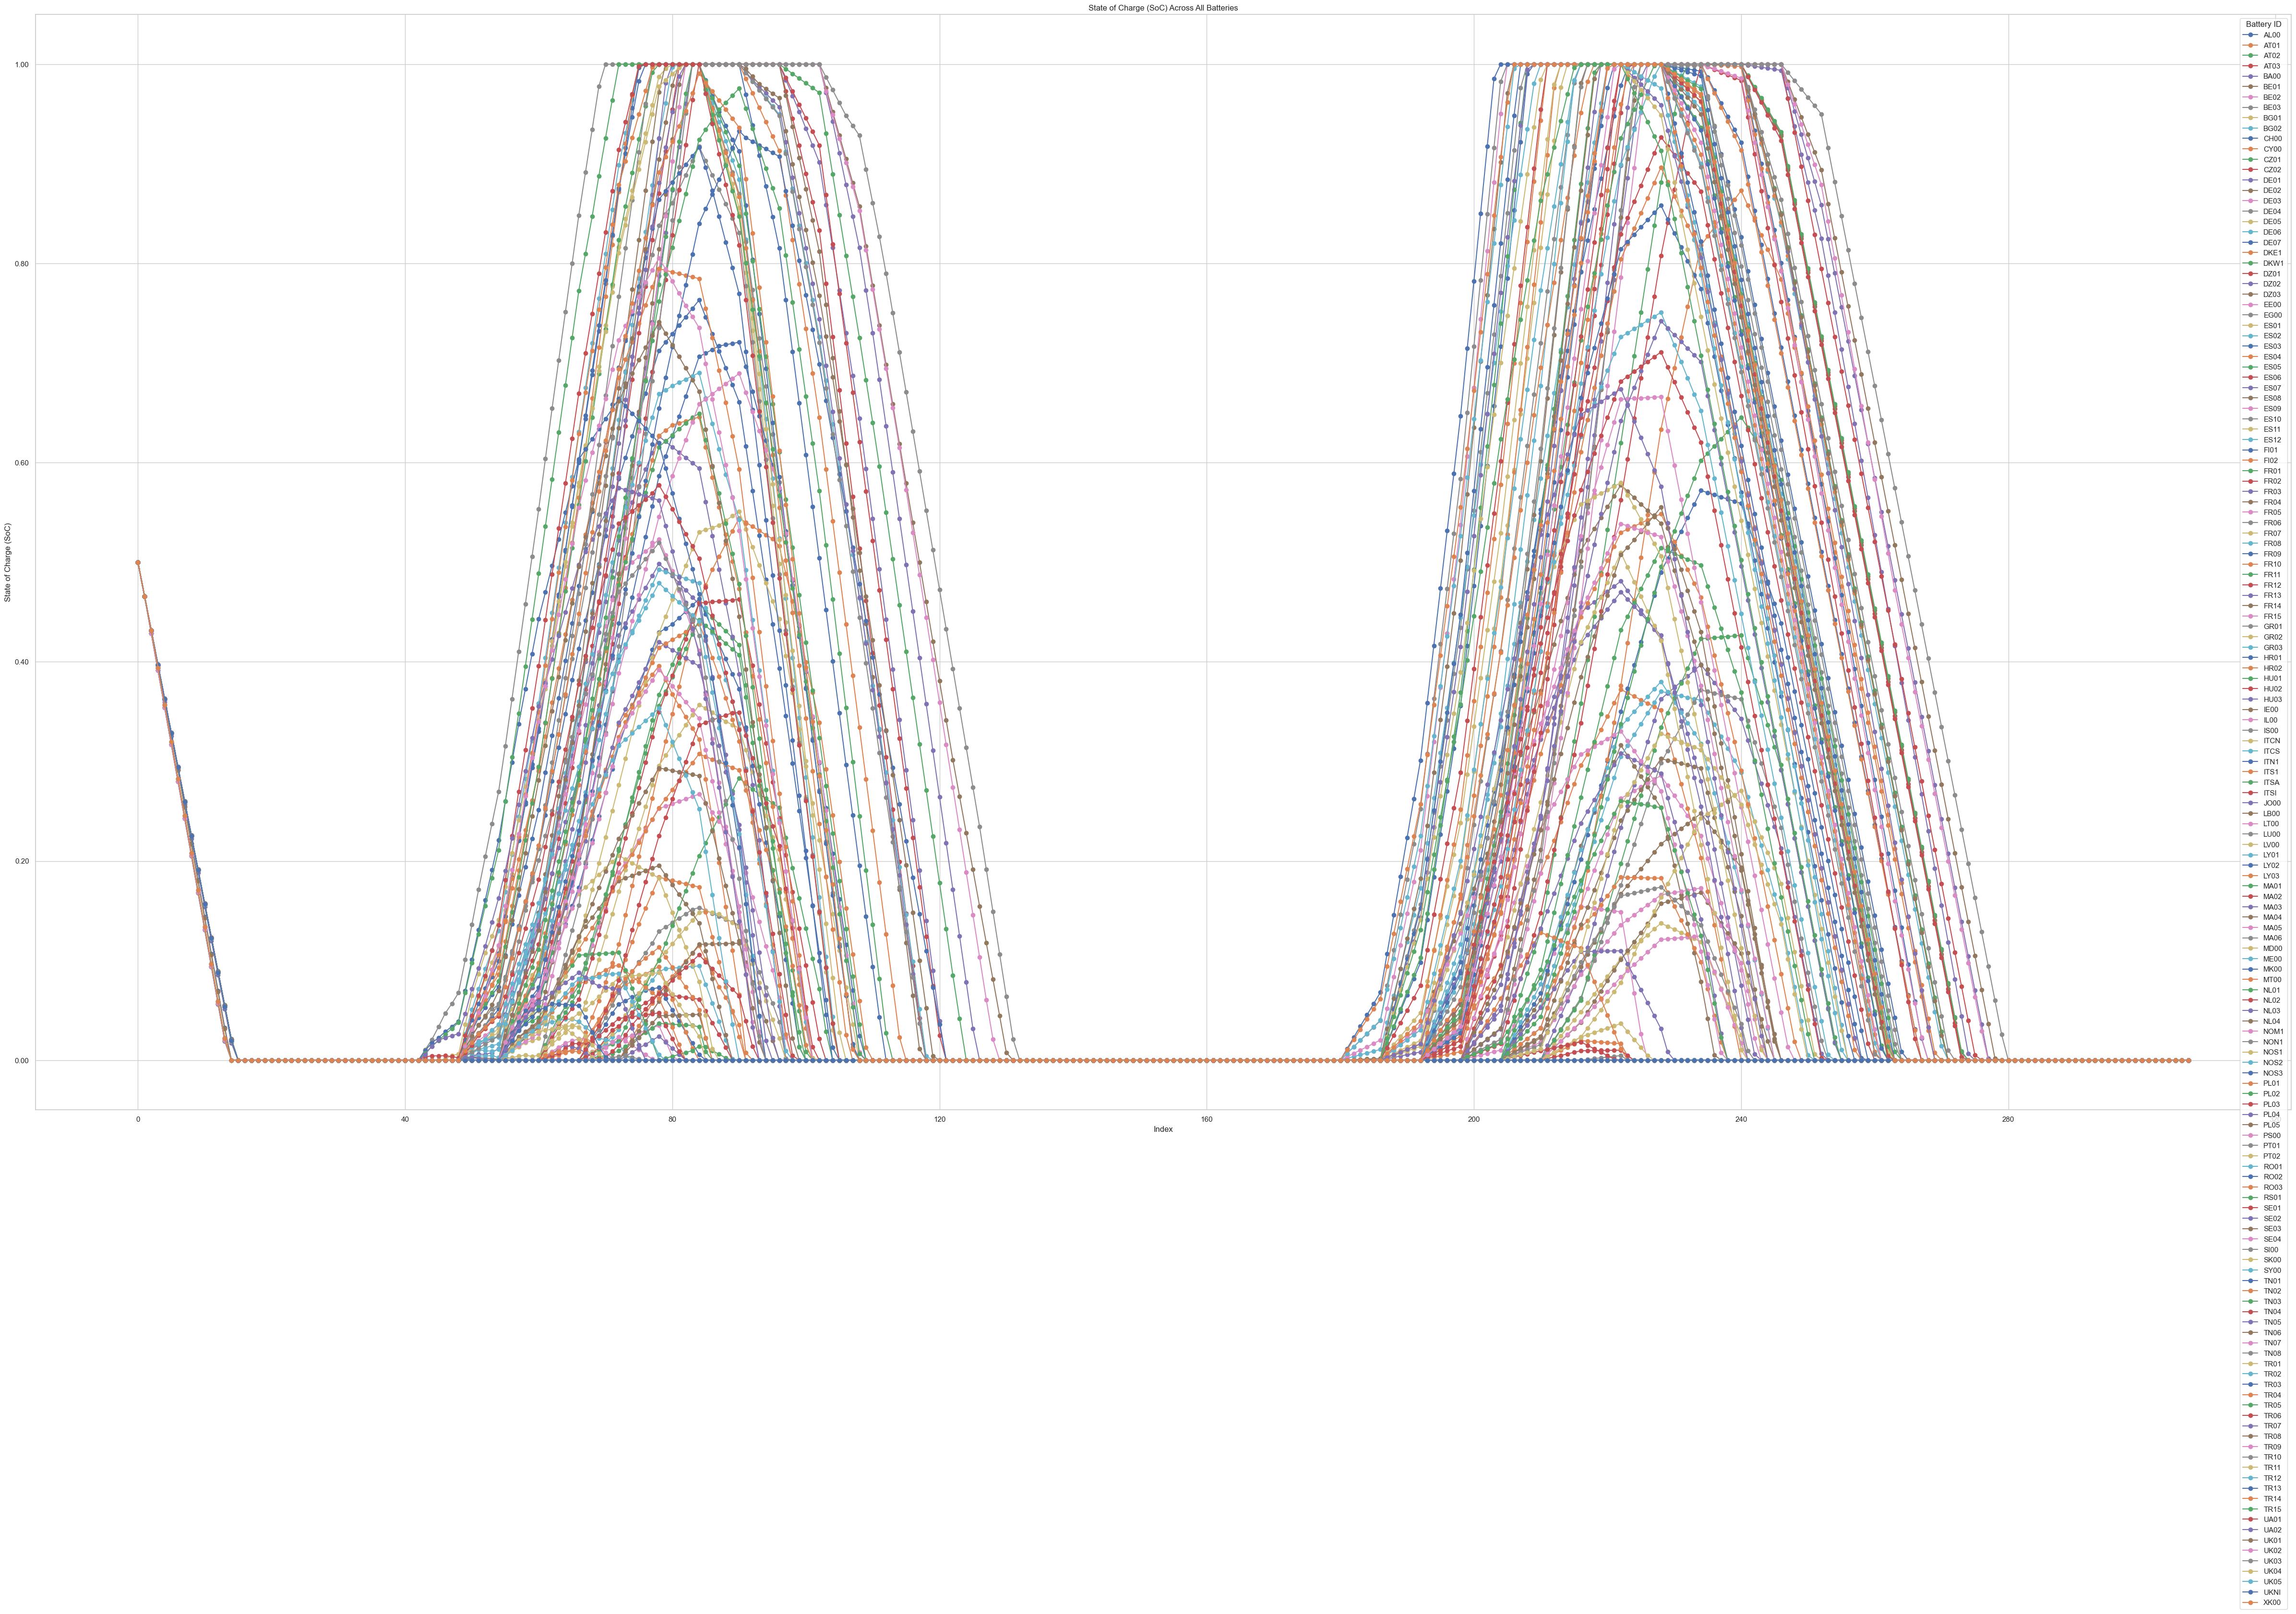

In [6]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(48, 32))

# Loop over each DataFrame and plot its 'soc' column
for key, df in battery_dataframes_plugin.items():
    if 'soc' not in df.columns:
        print(f"Skipping {key}: no 'soc' column found.")
        continue

    # Convert 'soc' to numeric if necessary
    df['soc'] = pd.to_numeric(df['soc'], errors='coerce')

    # Plot with label
    plt.plot(df.index, df['soc'], marker='o', linestyle='-', label=key)

# Customize plot
plt.title("State of Charge (SoC) Across All Batteries")
plt.xlabel("Index")
plt.ylabel("State of Charge (SoC)")
plt.grid(True)
plt.legend(title="Battery ID")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()

## Grid Dataframes

In [7]:
grid_dataframes_plugin = {}
grid_dataframes_scheduler = {}

for name, df in dataframes_plugin.items():
    existing_cols = [col for col in grid_cols if col in df.columns]
    grid_dataframes_plugin[name] = df[existing_cols]

for name, df in dataframes_default_scheduler.items():
    existing_cols = [col for col in grid_cols if col in df.columns]
    grid_dataframes_scheduler[name] = df[existing_cols]

### Rename headers

In [8]:
for key, df in grid_dataframes_plugin.items():
    df.columns = df.iloc[1]
    df = df.drop(index=[0, 1]).reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    grid_dataframes_plugin[key] = df

for key, df in grid_dataframes_scheduler.items():
    df.columns = df.iloc[1]
    df = df.drop(index=[0, 1]).reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    grid_dataframes_scheduler[key] = df


grid_dataframes_plugin['AL00']

1    co2_per_kwh_current  co2_production  export_price_current  grid_export  \
0                  999.0            -0.0              0.000876          0.0   
1                  999.0            -0.0              0.000876          0.0   
2                  999.0            -0.0              0.000876          0.0   
3                  999.0            -0.0              0.000876          0.0   
4                  999.0            -0.0              0.000876          0.0   
..                   ...             ...                   ...          ...   
303                999.0        719280.0              0.000876          0.0   
304                999.0        719280.0              0.000876          0.0   
305                999.0        719280.0              0.000876          0.0   
306                999.0        719280.0              0.000876          0.0   
307                999.0        719280.0              0.000876          0.0   

1    grid_import  grid_status_current  import_price_current    reward  
0           -0.0                  1.0              0.000973  0.000000  
1           -0.0                  1.0              0.000973  0.000000  
2           -0.0                  1.0              0.000973  0.000000  
3           -0.0                  1.0              0.000973  0.000000  
4           -0.0                  1.0              0.000973  0.000000  
..           ...                  ...                   ...       ...  
303        720.0                  1.0              0.000973 -0.700563  
304        720.0                  1.0              0.000973 -0.700563  
305        720.0                  1.0              0.000973 -0.700563  
306        720.0                  1.0              0.000973 -0.700563  
307        720.0                  1.0              0.000973 -0.700563  

[308 rows x 8 columns]

### Plot figures (Export, Import, CO2 Production)

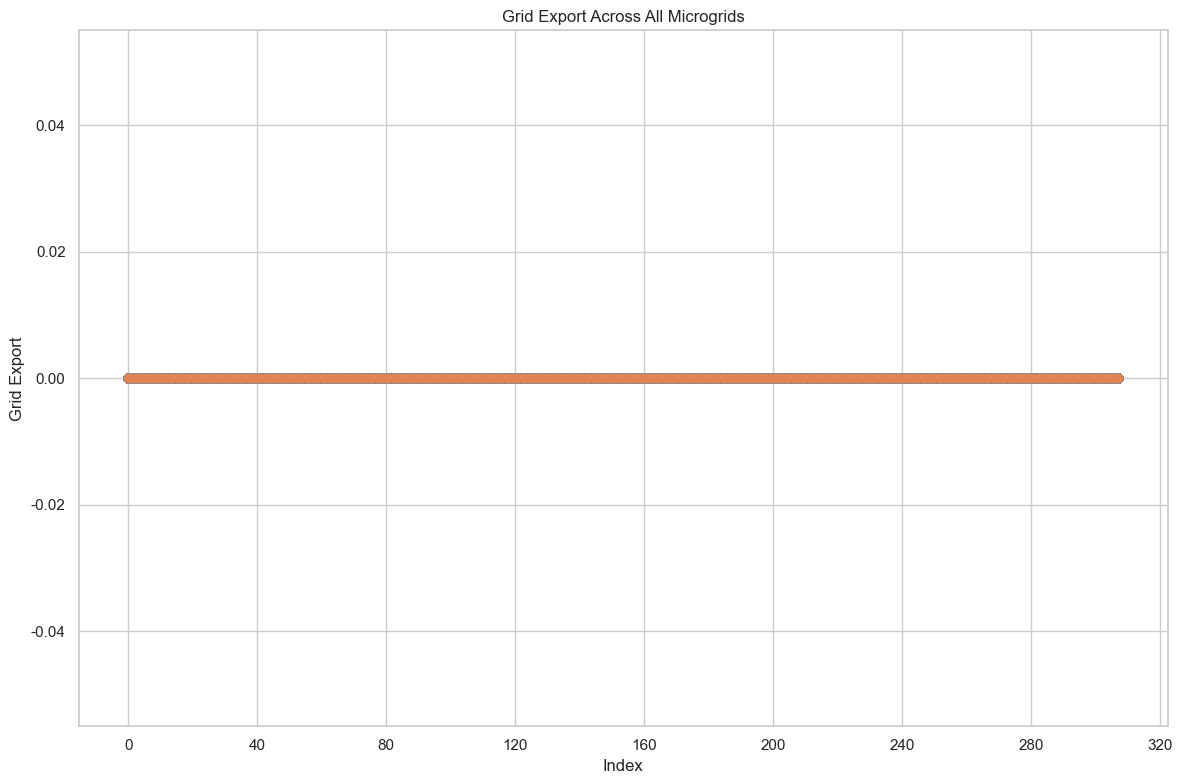

In [9]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop over each DataFrame and plot its 'soc' column
for key, df in grid_dataframes_plugin.items():
    if 'grid_export' not in df.columns:
        print(f"Skipping {key}: no 'grid_export' column found.")
        continue

    # Convert 'soc' to numeric if necessary
    df['grid_export'] = pd.to_numeric(df['grid_export'], errors='coerce')

    # Plot with label
    plt.plot(df.index, df['grid_export'], marker='o', linestyle='-', label=key)

# Customize plot
plt.title("Grid Export Across All Microgrids")
plt.xlabel("Index")
plt.ylabel("Grid Export")
plt.grid(True)
#plt.legend(title="Microgrid")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()

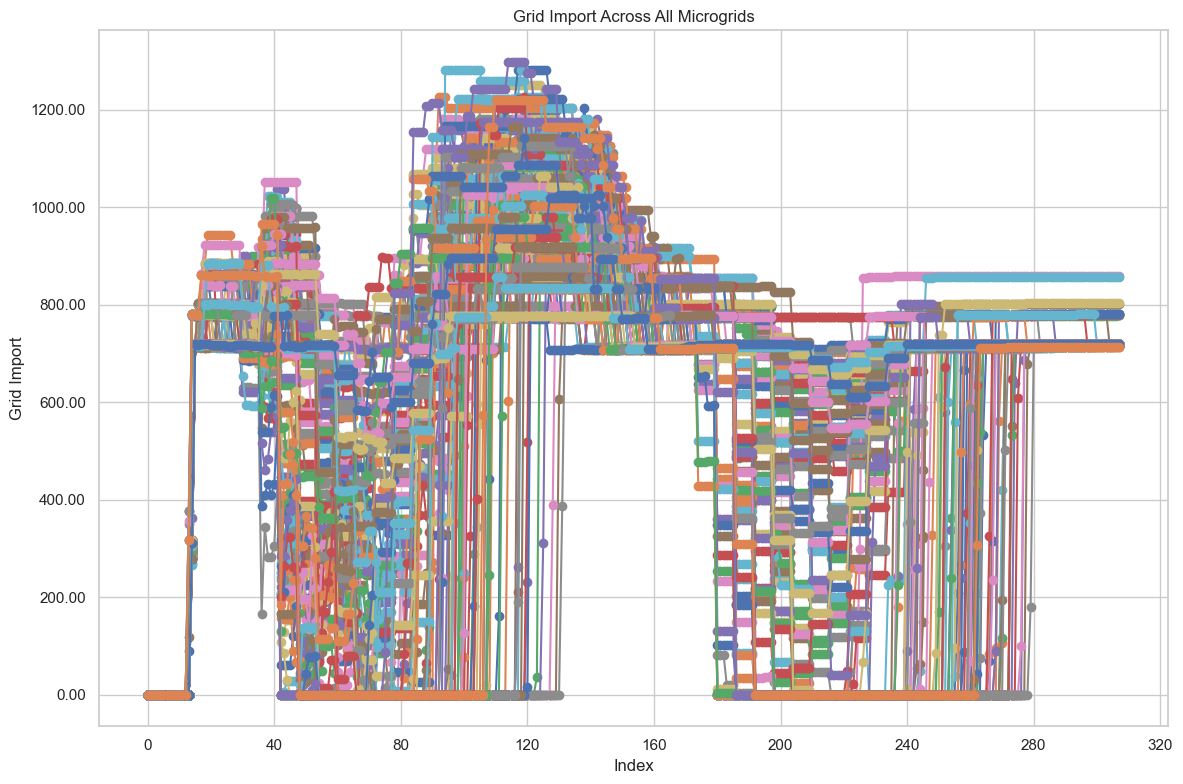

In [10]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(12, 8))

# Loop over each DataFrame and plot its 'soc' column
for key, df in grid_dataframes_plugin.items():
    if 'grid_import' not in df.columns:
        print(f"Skipping {key}: no 'grid_import' column found.")
        continue

    # Convert 'soc' to numeric if necessary
    df['grid_import'] = pd.to_numeric(df['grid_import'], errors='coerce')

    # Plot with label
    plt.plot(df.index, df['grid_import'], marker='o', linestyle='-', label=key)

# Customize plot
plt.title("Grid Import Across All Microgrids")
plt.xlabel("Index")
plt.ylabel("Grid Import")
plt.grid(True)
#plt.legend(title="Microgrid")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()

## PV Dataframes

In [11]:
pv_dataframes_plugin = {}
pv_dataframes_scheduler = {}

for name, df in dataframes_plugin.items():
    existing_cols = [col for col in pv_cols if col in df.columns]
    pv_dataframes_plugin[name] = df[existing_cols]

for name, df in dataframes_default_scheduler.items():
    existing_cols = [col for col in pv_cols if col in df.columns]
    pv_dataframes_scheduler[name] = df[existing_cols]

In [12]:
for key, df in pv_dataframes_plugin.items():
    df.columns = df.iloc[1]
    df = df.drop(index=[0, 1]).reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    pv_dataframes_plugin[key] = df

for key, df in pv_dataframes_scheduler.items():
    df.columns = df.iloc[1]
    df = df.drop(index=[0, 1]).reset_index(drop=True)
    df = df.apply(pd.to_numeric, errors='ignore')
    pv_dataframes_scheduler[key] = df


pv_dataframes_scheduler['AL00']

1    curtailment  renewable_current  renewable_used  reward
0            0.0                0.0             0.0     0.0
1            0.0                0.0             0.0     0.0
2            0.0                0.0             0.0     0.0
3            0.0                0.0             0.0     0.0
4            0.0                0.0             0.0     0.0
..           ...                ...             ...     ...
387          0.0                0.0             0.0     0.0
388          0.0                0.0             0.0     0.0
389          0.0                0.0             0.0     0.0
390          0.0                0.0             0.0     0.0
391          0.0                0.0             0.0     0.0

[392 rows x 4 columns]

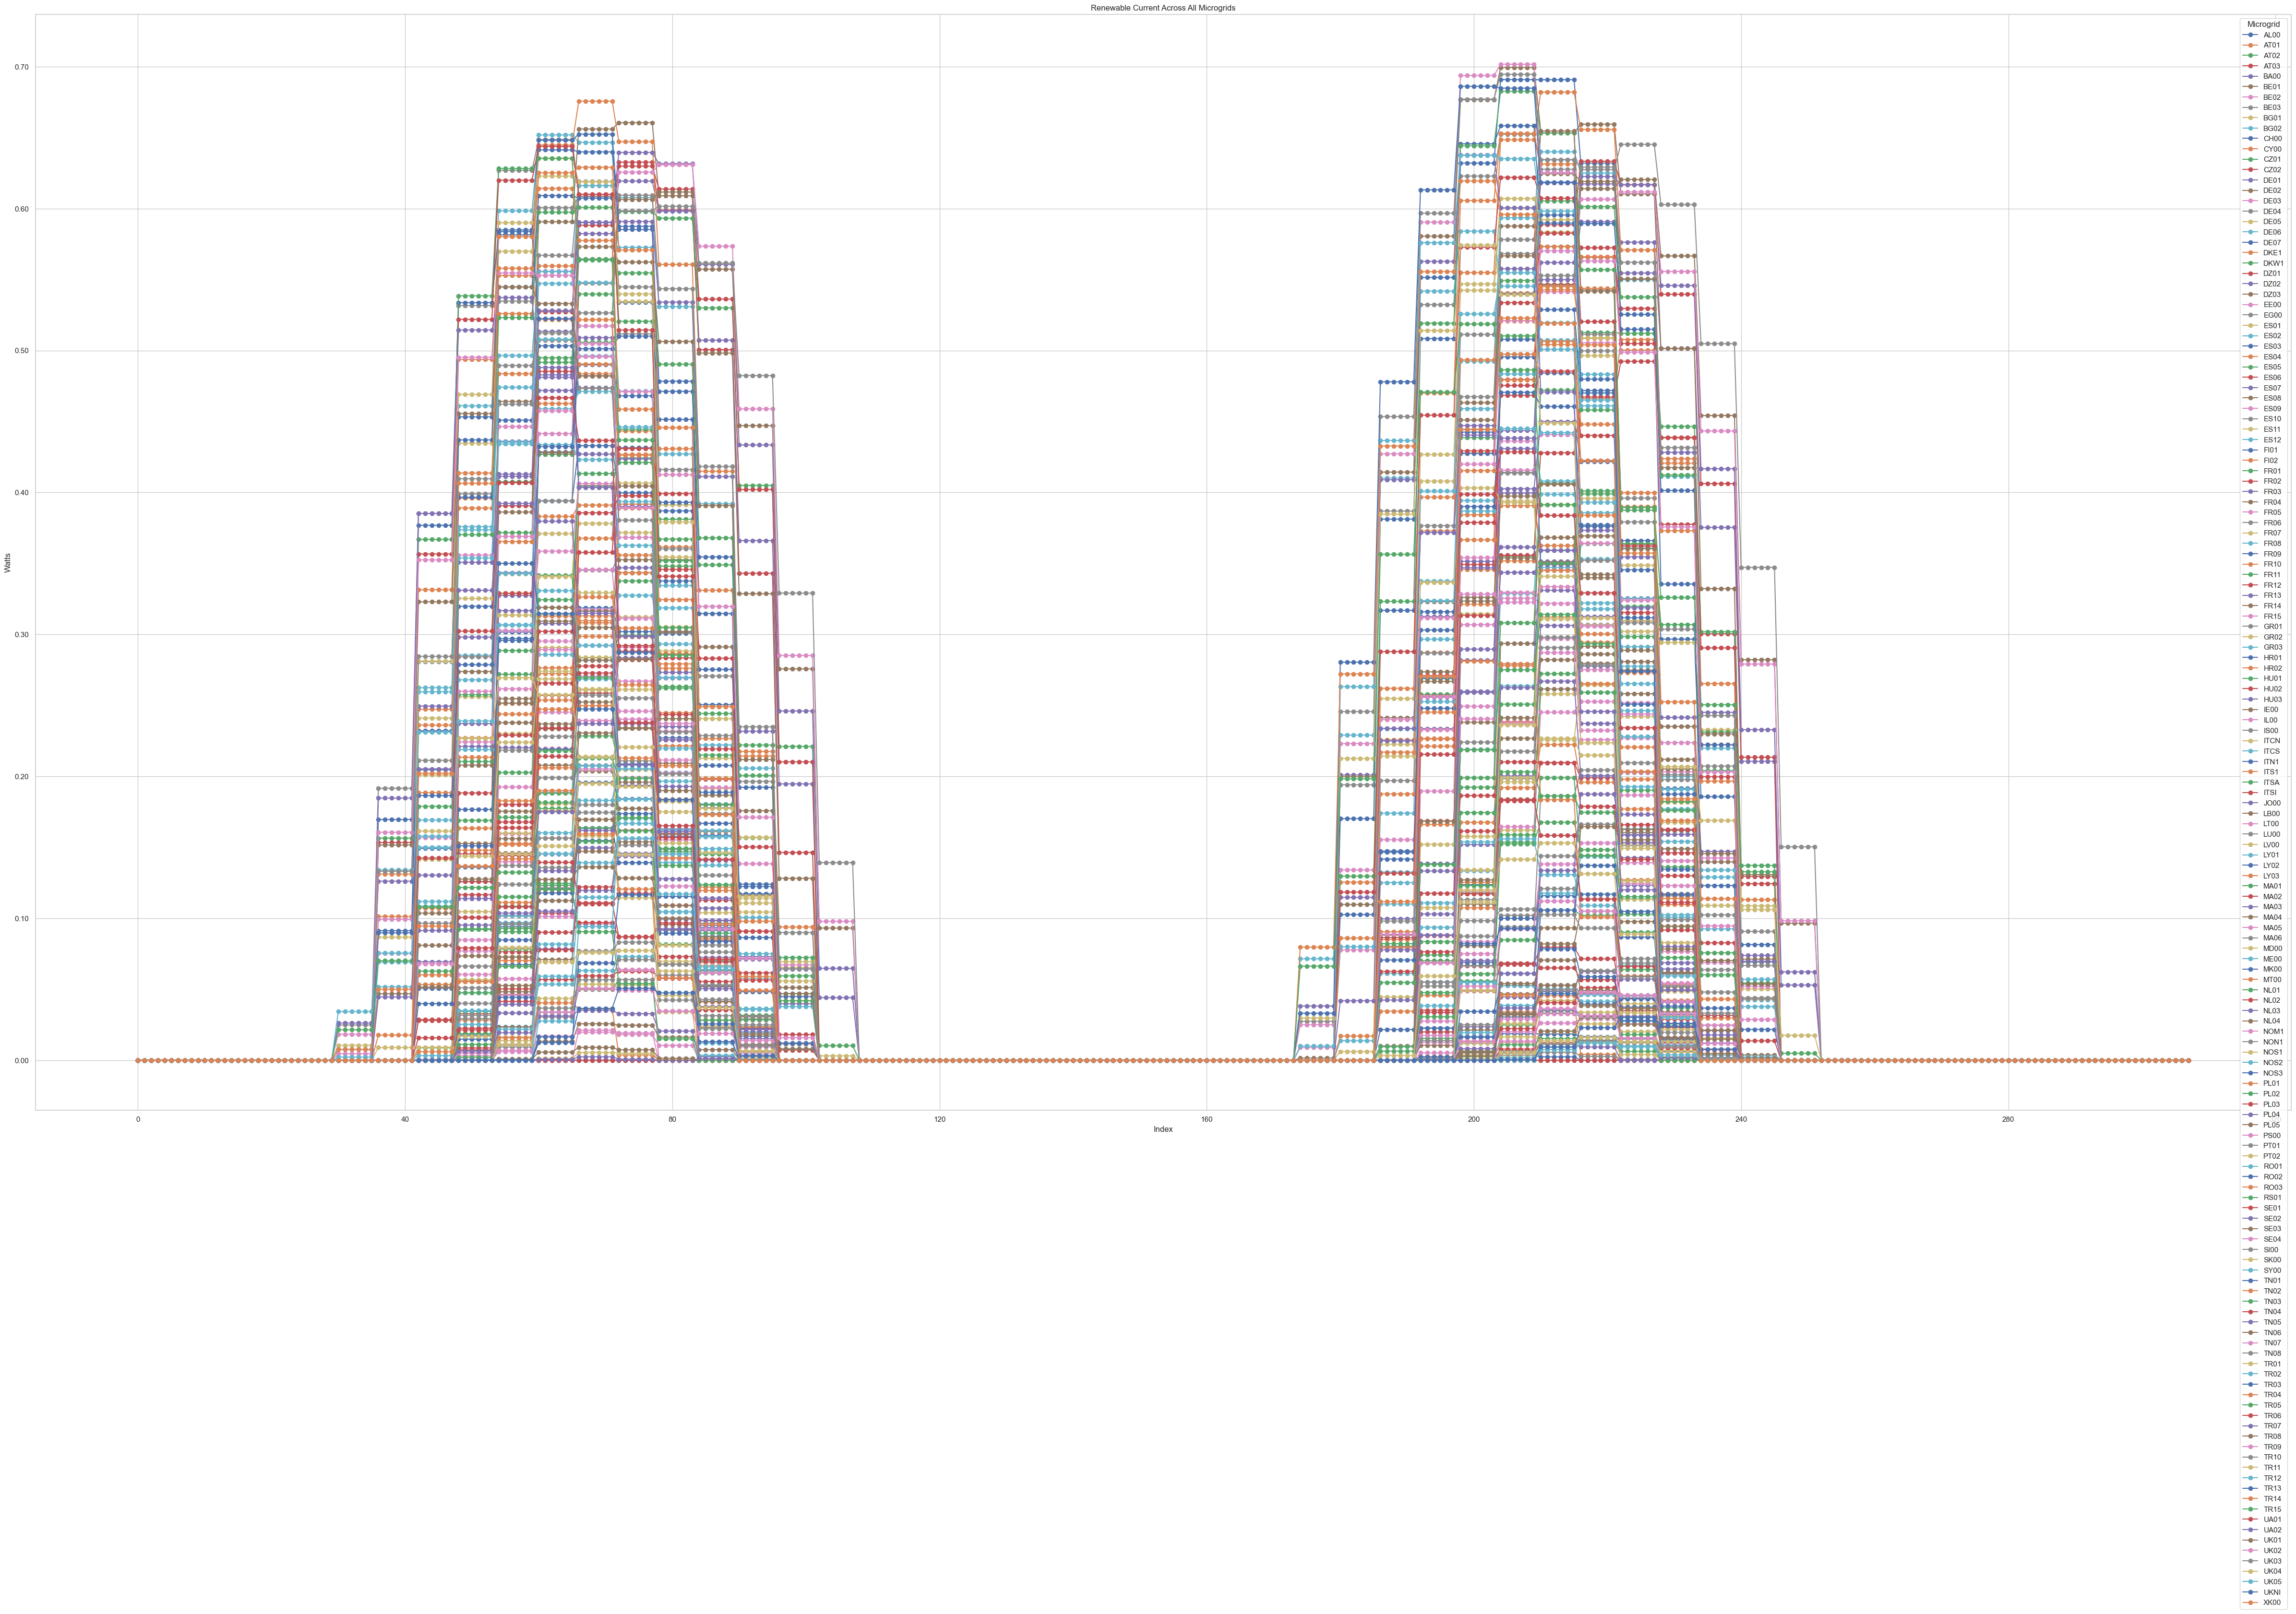

In [13]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(48, 32))

# Loop over each DataFrame and plot its 'soc' column
for key, df in pv_dataframes_plugin.items():
    if 'renewable_current' not in df.columns:
        print(f"Skipping {key}: no 'renewable_current' column found.")
        continue

    # Convert 'soc' to numeric if necessary
    df['renewable_current'] = pd.to_numeric(df['renewable_current'], errors='coerce')

    # Plot with label
    plt.plot(df.index, df['renewable_current'], marker='o', linestyle='-', label=key)

# Customize plot
plt.title("Renewable Current Across All Microgrids")
plt.xlabel("Index")
plt.ylabel("Watts")
plt.grid(True)
plt.legend(title="Microgrid")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()

In [19]:
pv_df = pv_dataframes_plugin.get('ES10')
pv_df.head(100)

1   curtailment  renewable_current  renewable_used  reward
0           0.0           0.000000        0.000000     0.0
1           0.0           0.000000        0.000000     0.0
2           0.0           0.000000        0.000000     0.0
3           0.0           0.000000        0.000000     0.0
4           0.0           0.000000        0.000000     0.0
..          ...                ...             ...     ...
95          0.0           0.196420        0.196420     0.0
96          0.0           0.089997        0.089997     0.0
97          0.0           0.089997        0.089997     0.0
98          0.0           0.089997        0.089997     0.0
99          0.0           0.089997        0.089997     0.0

[100 rows x 4 columns]

## Explore relation between PV Generation, Battery current_charge, grid import/export

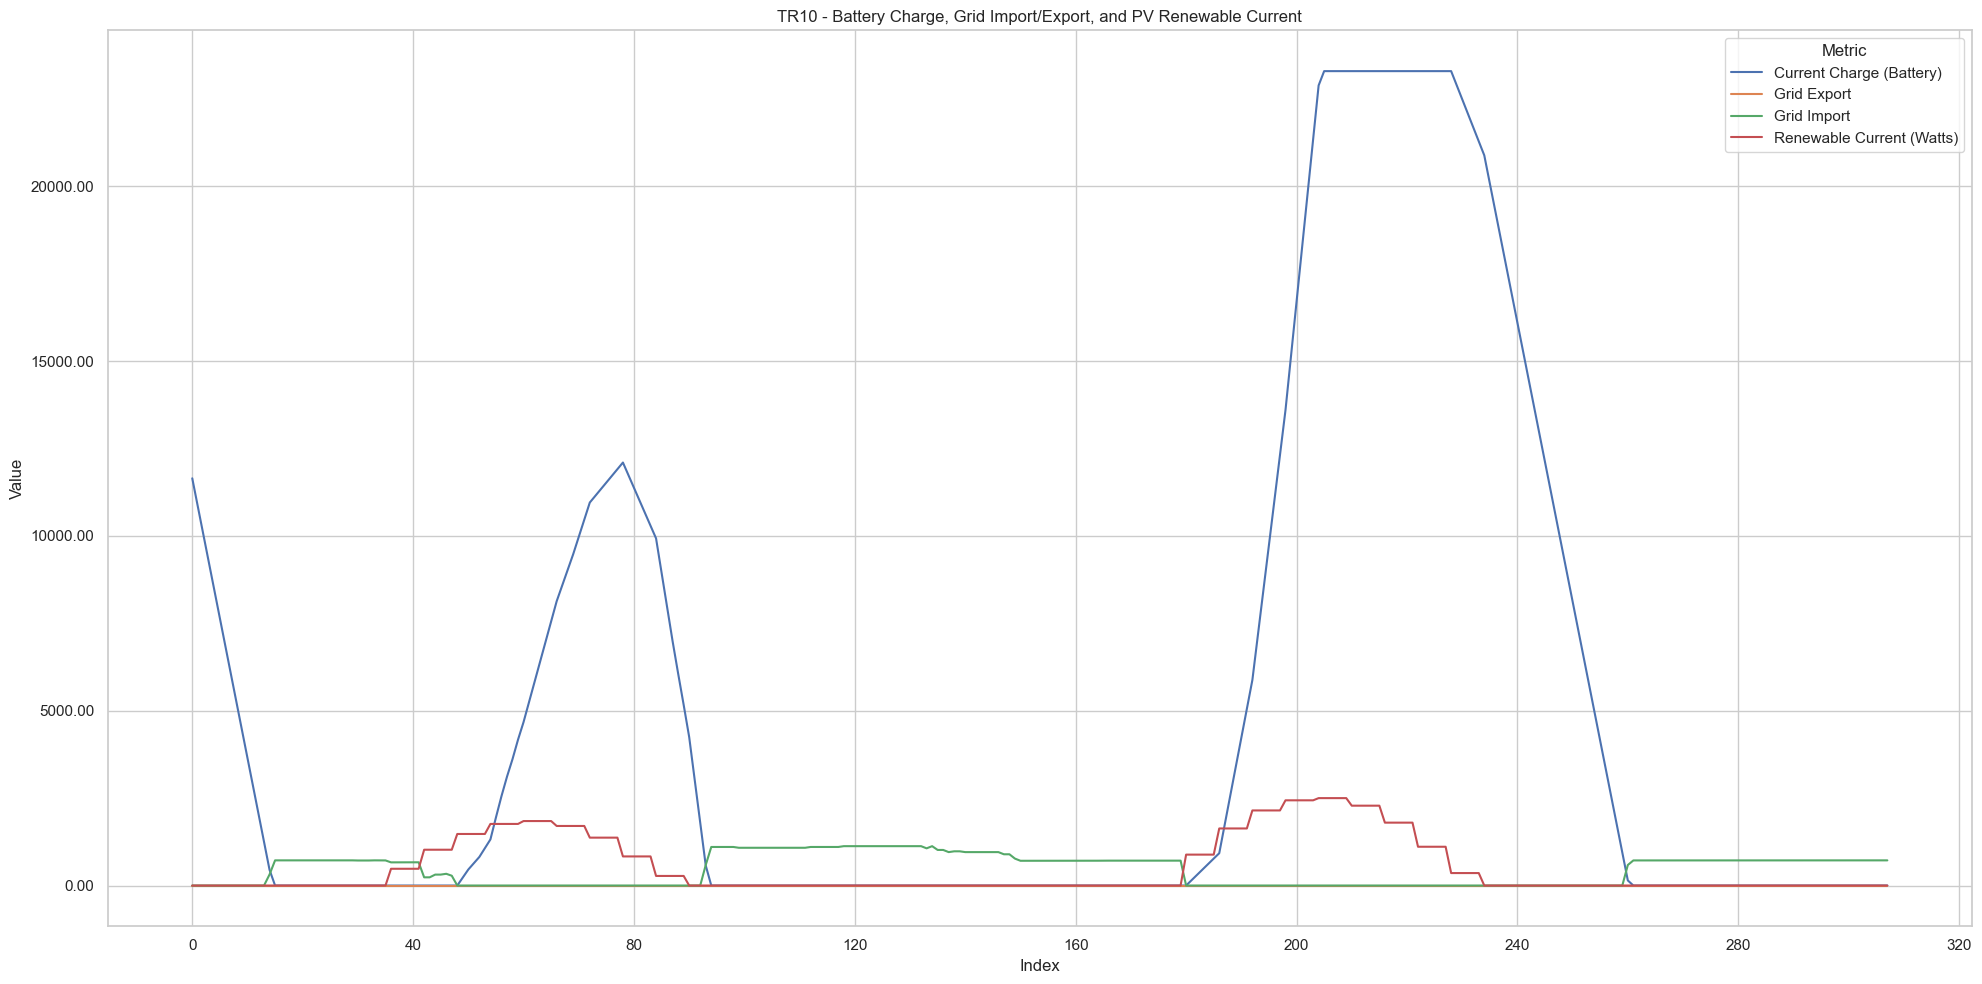

In [22]:
# Set Seaborn style
sns.set(style="whitegrid")

# Extract the relevant DataFrames
battery_df = battery_dataframes_plugin.get('TR10')
grid_df = grid_dataframes_plugin.get('TR10')
pv_df = pv_dataframes_plugin.get('TR10')

# Check that all exist
if battery_df is None or grid_df is None or pv_df is None:
    raise ValueError("One or more dataframes for 'TR10' are missing.")

# Convert necessary columns to numeric
battery_df['current_charge'] = pd.to_numeric(battery_df['current_charge'], errors='coerce')
grid_df['grid_export'] = pd.to_numeric(grid_df['grid_export'], errors='coerce')
grid_df['grid_import'] = pd.to_numeric(grid_df['grid_import'], errors='coerce')
pv_df['renewable_current'] = pd.to_numeric(pv_df['renewable_current'], errors='coerce')

# Scale renewable_current to watt-hours (assuming it's energy per second)
pv_df['renewable_current_watts'] = pv_df['renewable_current'] * 3600

# Create the plot
plt.figure(figsize=(20, 10))

# Plot each series from its respective DataFrame
plt.plot(battery_df.index, battery_df['current_charge'], label='Current Charge (Battery)')
plt.plot(grid_df.index, grid_df['grid_export'], label='Grid Export')
plt.plot(grid_df.index, grid_df['grid_import'], label='Grid Import')
plt.plot(pv_df.index, pv_df['renewable_current_watts'], label='Renewable Current (Watts)')

# Customize the plot
plt.title("TR10 - Battery Charge, Grid Import/Export, and PV Renewable Current")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend(title="Metric")
plt.grid(True)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
plt.show()